In [1]:
import numpy as np
import sys
import os
from src.IsoEM import IsoEM
import matplotlib.pyplot as plt
import re
import pandas as pd

## Run Expectation Maximization

#### Define File Paths

In [2]:
# Define File Paths

data_path = f"{os.getcwd()}/data/"
transcriptome_path = data_path + "chr11_transcriptome.fasta"
alignment_path = data_path + "aligned.bam"

#### Initialize IsoEM class with data paths and set maximum iterations and convergence threshold.

In [3]:
isoem = IsoEM(transcriptome_path, alignment_path, max_iter=500, convergence_threshold=0.005)

[E::idx_find_and_load] Could not retrieve index file for '/Users/arushramteke/Desktop/CM121/Project/RNASeq-Quantification/data/aligned.bam'


#### Run Expectation Maximization Algorithm

In [4]:
isoem.EM()

Iteration: 1, Median Relative Difference: 0.9321344400772182
Iteration: 2, Median Relative Difference: 0.12207223168281162
Iteration: 3, Median Relative Difference: 0.08564758049347007
Iteration: 4, Median Relative Difference: 0.06481661741407235
Iteration: 5, Median Relative Difference: 0.049135926140851716
Iteration: 6, Median Relative Difference: 0.04042993037516829
Iteration: 7, Median Relative Difference: 0.034603577732955595
Iteration: 8, Median Relative Difference: 0.02963299900782284


KeyboardInterrupt: 

In [5]:
df, meddiff, avgdiff = isoem.get_results()

#### Results Table

In [6]:
df

,transcript,length,effective_length,expected_counts,tpm
0,ENST00000410108,637,438,116,184.84
1,ENST00000325147,2916,2717,302,77.13
2,ENST00000382762,2792,2593,1234,329.52
3,ENST00000529614,560,361,4,9.39
4,ENST00000332865,533,334,26,55.38
...,...,...,...,...,...
7133,ENST00000339772,3152,2953,9,2.14
7134,ENST00000535456,3251,3052,3,0.88
7135,ENST00000392580,3522,3323,0,0.00
7136,ENST00000312527,3976,3777,0,0.00


#### Plot Median Relative Difference

([<matplotlib.axis.XTick at 0x7fe4b9ea9fc0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25')])

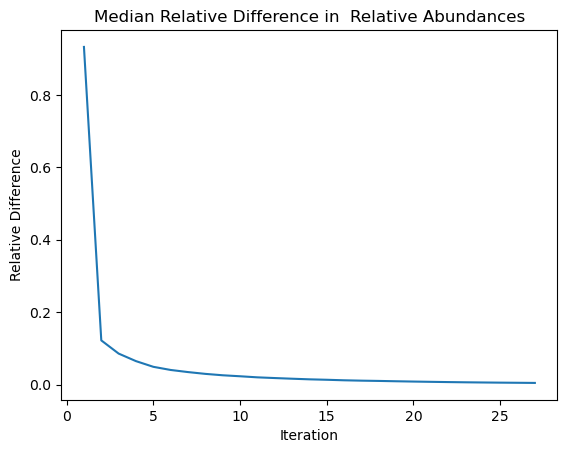

In [7]:
plt.plot(np.arange(1, len(meddiff) + 1), meddiff)
plt.ylabel('Relative Difference')
plt.xlabel('Iteration')
plt.title('Median Relative Difference in  Relative Abundances')
plt.xticks(range(0,len(meddiff) + 1, 5))

#### Save Results

In [8]:
df.to_csv(f'{os.getcwd()}/results/table.csv')
with open(f'{os.getcwd()}/results/median_relative_diffs.npy', 'wb') as f:
    np.save(f, meddiff)
with open(f'{os.getcwd()}/results/mean_relative_diffs.npy', 'wb') as f:
    np.save(f, avgdiff)

## Comparison with Kallisto

In [5]:
kallisto = pd.read_csv(f'{os.getcwd()}/kallisto/output/abundance.tsv', sep='\t')
em = pd.read_csv(f'{os.getcwd()}/results/table.csv')

In [10]:
kallisto

,target_id,length,eff_length,est_counts,tpm
0,ENST00000410108,637,438,115.22,230.18
1,ENST00000325147,2916,2717,146.54,47.20
2,ENST00000382762,2792,2593,"1,419.01",478.85
3,ENST00000529614,560,361,0,0
4,ENST00000332865,533,334,0,0
...,...,...,...,...,...
7133,ENST00000339772,3152,2953,13,3.85
7134,ENST00000535456,3251,3052,0,0
7135,ENST00000392580,3522,3323,0,0
7136,ENST00000312527,3976,3777,0,0


In both cases, the transcripts are sorted according to the FASTA file, so we can perform a direct comparison on the arrays.

In [8]:
kallisto.sort_values(by='target_id')
em.sort_values(by='transcript')
kallisto_counts, kallisto_abundances = kallisto['est_counts'].to_numpy(), kallisto['tpm'].to_numpy()
em_counts, em_abundances = em['expected_counts'].to_numpy(), em['tpm'].to_numpy()

In [18]:
kallisto

,target_id,length,eff_length,est_counts,tpm
0,ENST00000410108,637,438,115.22,230.18
1,ENST00000325147,2916,2717,146.54,47.20
2,ENST00000382762,2792,2593,"1,419.01",478.85
3,ENST00000529614,560,361,0,0
4,ENST00000332865,533,334,0,0
...,...,...,...,...,...
7133,ENST00000339772,3152,2953,13,3.85
7134,ENST00000535456,3251,3052,0,0
7135,ENST00000392580,3522,3323,0,0
7136,ENST00000312527,3976,3777,0,0


In [17]:
em

,Unnamed: 0,transcript,length,effective_length,expected_counts,tpm
0,0,ENST00000410108,637,438,116,184.84
1,1,ENST00000325147,2916,2717,302,77.13
2,2,ENST00000382762,2792,2593,1234,329.52
3,3,ENST00000529614,560,361,4,9.39
4,4,ENST00000332865,533,334,26,55.38
...,...,...,...,...,...,...
7133,7133,ENST00000339772,3152,2953,9,2.14
7134,7134,ENST00000535456,3251,3052,3,0.88
7135,7135,ENST00000392580,3522,3323,0,0.00
7136,7136,ENST00000312527,3976,3777,0,0.00


In [26]:
def relativeMedianAE(a, b):
    return np.median(np.abs(((a-b))/(a + 0.001)))

In [27]:
def relativeMAE(a, b):
    return np.mean(np.abs(((a-b))/(a + 0.001)))

In [28]:
print('Relative Median Absolute Error of Abundances: ', relativeMedianAE(kallisto_abundances, em_abundances))

Relative Median Absolute Error of Abundances:  0.4170535922078804


In [29]:
print('Relative Mean Absolute Error of Abundances: ', relativeMAE(kallisto_abundances, em_abundances))

Relative Mean Absolute Error of Abundances:  21805.85398438921


/var/folders/wg/rc950kx52952n0613q25df340000gn/T/ipykernel_86729/4097752680.py:2: RuntimeWarning: divide by zero encountered in log
  sns.boxplot(-np.log(np.abs((em_abundances-kallisto_abundances)/(kallisto_abundances + 0.001))))


<Axes: >

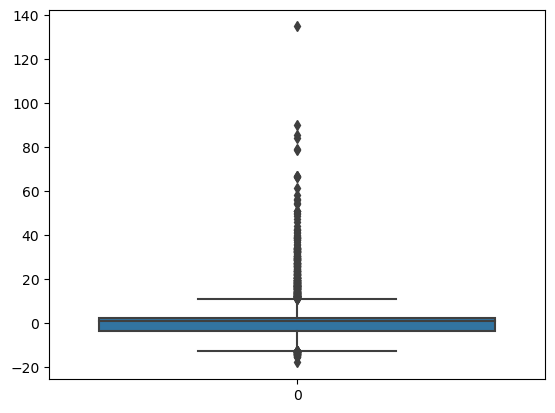

In [40]:
import seaborn as sns
sns.boxplot(-np.log(np.abs((em_abundances-kallisto_abundances)/(kallisto_abundances + 0.001))))

In [49]:
np.argmax(np.abs(kallisto_abundances - em_abundances))

75